# Automated Crypto Website API Pull

## Importing data from CoinMarketCap API

In [71]:
#This example uses Python 2.7 and the python-request library. API documentation taken from CoinMarketCap website

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8ae20bb8-5c93-452d-93a4-cdd2c1d69c51',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-03-01T03:37:18.312Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 8861}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10841, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [72]:
type(data)

dict

In [73]:
# Import libraries for later datafram manipulation
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

## Viewing the data and putting into dataframe

In [74]:
# Assigning data to a dataframe
df = pd.json_normalize(data['data'])

# Adding timestamp for when this data is pulled
df['timestamp'] = pd.to_datetime('now')
df

id         name symbol          slug  num_market_pairs   
0       1      Bitcoin    BTC       bitcoin             10841  \
1    1027     Ethereum    ETH      ethereum              8479   
2     825  Tether USDt   USDT        tether             76550   
3    1839          BNB    BNB           bnb              2079   
4    5426       Solana    SOL        solana               628   
5      52          XRP    XRP           xrp              1237   
6    3408         USDC   USDC      usd-coin             16946   
7    2010      Cardano    ADA       cardano              1085   
8      74     Dogecoin   DOGE      dogecoin               898   
9    5805    Avalanche   AVAX     avalanche               674   
10   1958         TRON    TRX          tron               937   
11   1975    Chainlink   LINK     chainlink              1659   
12   6636     Polkadot    DOT  polkadot-new               696   
13   3890      Polygon  MATIC       polygon              1295   
14  11419      Toncoin    TON       toncoin               204   

                  date_added   
0   2010-07-13T00:00:00.000Z  \
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2020-04-10T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2018-10-08T00:00:00.000Z   
7   2017-10-01T00:00:00.000Z   
8   2013-12-15T00:00:00.000Z   
9   2020-07-13T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2017-09-20T00:00:00.000Z   
12  2020-08-19T00:00:00.000Z   
13  2019-04-28T00:00:00.000Z   
14  2021-08-26T13:40:22.000Z   

                                                 tags    max_supply   
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07  \
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
7   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
8   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
9   [defi, smart-contracts, three-arrows-capital-p...  7.200000e+08   
10  [media, payments, tron-ecosystem, layer-1, dwf...           NaN   
11  [platform, defi, oracles, smart-contracts, sub...  1.000000e+09   
12  [substrate, polkadot, binance-chain, polkadot-...           NaN   
13  [pos, platform, enterprise-solutions, zero-kno...  1.000000e+10   
14  [pos, layer-1, ftx-bankruptcy-estate, dwf-labs...           NaN   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank   
0         1.964136e+07  1.964136e+07            False       NaN         1  \
1         1.201421e+08  1.201421e+08             True       NaN         2   
2         9.879803e+10  1.016001e+11             True       NaN         3   
3         1.495423e+08  1.495423e+08            False       NaN         4   
4         4.427042e+08  5.707088e+08             True       NaN         5   
5         5.459425e+10  9.998787e+10            False       NaN         6   
6         2.875510e+10  2.875510e+10            False       NaN         7   
7         3.547982e+10  3.667143e+10            False       NaN         8   
8         1.432808e+11  1.432808e+11             True       NaN         9   
9         3.772281e+08  4.359178e+08            False       NaN        10   
10        8.797596e+10  8.797597e+10             True       NaN        11   
11        5.871000e+08  1.000000e+09            False       NaN        12   
12        1.289594e+09  1.416655e+09             True       NaN        13   
13        9.899154e+09  1.000000e+10            False       NaN        14   
14        3.467980e+09  5.103487e+09             True       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_ratio   
0      

## Creating automated API runner function

In [75]:
# Moving all the code above into one function I can run later in the automation section
# The API_runner function takes in a dataframe, and returns a new dataframe with appended data

def api_runner(df):
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '8ae20bb8-5c93-452d-93a4-cdd2c1d69c51',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
        # Commenting out the below so it doesn't print every time it runs
#       print(data) 
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Assigning data to a dataframe
    df2 = pd.json_normalize(data['data'])

    # Adding timestamp for when this data is pulled
    df2['timestamp'] = pd.to_datetime('now')
    
    # Append to the original DataFrame
    df = pd.concat([df, df2], ignore_index=True)

    # Save the updated DataFrame to a CSV file
    if not os.path.isfile('/Users/niksupatravanij/Downloads/API.csv'):
        df.to_csv('/Users/niksupatravanij/Downloads/API.csv', header='column_names', index=False)
    else:
        df.to_csv('/Users/niksupatravanij/Downloads/API.csv', header=False, mode='a', index=False)

    return df

In [76]:
# Importing libraries for time-dependent automation
import os
from time import time
from time import sleep

## Calling the API_runner function every minute

In [77]:
# Loop to run the API_runner function every 1 minute
for i in range(333):
    df = api_runner(df)
    print('API Runner completed successfully')
    sleep(60) #Sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner com

KeyboardInterrupt: 

In [78]:
df

id         name symbol          slug  num_market_pairs   
0        1      Bitcoin    BTC       bitcoin             10841  \
1     1027     Ethereum    ETH      ethereum              8479   
2      825  Tether USDt   USDT        tether             76550   
3     1839          BNB    BNB           bnb              2079   
4     5426       Solana    SOL        solana               628   
5       52          XRP    XRP           xrp              1237   
6     3408         USDC   USDC      usd-coin             16946   
7     2010      Cardano    ADA       cardano              1085   
8       74     Dogecoin   DOGE      dogecoin               898   
9     5805    Avalanche   AVAX     avalanche               674   
10    1958         TRON    TRX          tron               937   
11    1975    Chainlink   LINK     chainlink              1659   
12    6636     Polkadot    DOT  polkadot-new               696   
13    3890      Polygon  MATIC       polygon              1295   
14   11419      Toncoin    TON       toncoin               204   
15       1      Bitcoin    BTC       bitcoin             10841   
16    1027     Ethereum    ETH      ethereum              8479   
17     825  Tether USDt   USDT        tether             76550   
18    1839          BNB    BNB           bnb              2079   
19    5426       Solana    SOL        solana               628   
20      52          XRP    XRP           xrp              1237   
21    3408         USDC   USDC      usd-coin             16946   
22    2010      Cardano    ADA       cardano              1085   
23      74     Dogecoin   DOGE      dogecoin               898   
24    5805    Avalanche   AVAX     avalanche               674   
25    1958         TRON    TRX          tron               937   
26    1975    Chainlink   LINK     chainlink              1659   
27    6636     Polkadot    DOT  polkadot-new               696   
28    3890      Polygon  MATIC       polygon              1295   
29   11419      Toncoin    TON       toncoin               204   
30       1      Bitcoin    BTC       bitcoin             10841   
31    1027     Ethereum    ETH      ethereum              8479   
32     825  Tether USDt   USDT        tether             76550   
33    1839          BNB    BNB           bnb              2079   
34    5426       Solana    SOL        solana               628   
35      52          XRP    XRP           xrp              1237   
36    3408         USDC   USDC      usd-coin             16946   
37    2010      Cardano    ADA       cardano              1085   
38      74     Dogecoin   DOGE      dogecoin               898   
39    5805    Avalanche   AVAX     avalanche               674   
40    1958         TRON    TRX          tron               937   
41    1975    Chainlink   LINK     chainlink              1659   
42    6636     Polkadot    DOT  polkadot-new               696   
43    3890      Polygon  MATIC       polygon              1295   
44   11419      Toncoin    TON       toncoin               204   
45       1      Bitcoin    BTC       bitcoin             10841   
46    1027     Ethereum    ETH      ethereum              8479   
47     825  Tether USDt   USDT        tether             76550   
48    1839          BNB    BNB           bnb              2079   
49    5426       Solana    SOL        solana               628   
50      52          XRP    XRP           xrp              1237   
51    3408         USDC   USDC      usd-coin             16946   
52    2010      Cardano    ADA       cardano              1085   
53      74     Dogecoin   DOGE      dogecoin               898   
54    5805    Avalanche   AVAX     avalanche               674   
55    1958         TRON    TRX          tron               937   
56    1975    Chainlink   LINK     chainlink              1659   
57    6636     Polkadot    DOT  polkadot-new               696   
58    3890      Polygon  MATIC       polygon              1295   
59   11419      Toncoin    TON       toncoin    

## Formatting the data, cleaning it a bit

In [79]:
# Set the display format for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

id         name symbol          slug  num_market_pairs   
0        1      Bitcoin    BTC       bitcoin             10841  \
1     1027     Ethereum    ETH      ethereum              8479   
2      825  Tether USDt   USDT        tether             76550   
3     1839          BNB    BNB           bnb              2079   
4     5426       Solana    SOL        solana               628   
5       52          XRP    XRP           xrp              1237   
6     3408         USDC   USDC      usd-coin             16946   
7     2010      Cardano    ADA       cardano              1085   
8       74     Dogecoin   DOGE      dogecoin               898   
9     5805    Avalanche   AVAX     avalanche               674   
10    1958         TRON    TRX          tron               937   
11    1975    Chainlink   LINK     chainlink              1659   
12    6636     Polkadot    DOT  polkadot-new               696   
13    3890      Polygon  MATIC       polygon              1295   
14   11419      Toncoin    TON       toncoin               204   
15       1      Bitcoin    BTC       bitcoin             10841   
16    1027     Ethereum    ETH      ethereum              8479   
17     825  Tether USDt   USDT        tether             76550   
18    1839          BNB    BNB           bnb              2079   
19    5426       Solana    SOL        solana               628   
20      52          XRP    XRP           xrp              1237   
21    3408         USDC   USDC      usd-coin             16946   
22    2010      Cardano    ADA       cardano              1085   
23      74     Dogecoin   DOGE      dogecoin               898   
24    5805    Avalanche   AVAX     avalanche               674   
25    1958         TRON    TRX          tron               937   
26    1975    Chainlink   LINK     chainlink              1659   
27    6636     Polkadot    DOT  polkadot-new               696   
28    3890      Polygon  MATIC       polygon              1295   
29   11419      Toncoin    TON       toncoin               204   
30       1      Bitcoin    BTC       bitcoin             10841   
31    1027     Ethereum    ETH      ethereum              8479   
32     825  Tether USDt   USDT        tether             76550   
33    1839          BNB    BNB           bnb              2079   
34    5426       Solana    SOL        solana               628   
35      52          XRP    XRP           xrp              1237   
36    3408         USDC   USDC      usd-coin             16946   
37    2010      Cardano    ADA       cardano              1085   
38      74     Dogecoin   DOGE      dogecoin               898   
39    5805    Avalanche   AVAX     avalanche               674   
40    1958         TRON    TRX          tron               937   
41    1975    Chainlink   LINK     chainlink              1659   
42    6636     Polkadot    DOT  polkadot-new               696   
43    3890      Polygon  MATIC       polygon              1295   
44   11419      Toncoin    TON       toncoin               204   
45       1      Bitcoin    BTC       bitcoin             10841   
46    1027     Ethereum    ETH      ethereum              8479   
47     825  Tether USDt   USDT        tether             76550   
48    1839          BNB    BNB           bnb              2079   
49    5426       Solana    SOL        solana               628   
50      52          XRP    XRP           xrp              1237   
51    3408         USDC   USDC      usd-coin             16946   
52    2010      Cardano    ADA       cardano              1085   
53      74     Dogecoin   DOGE      dogecoin               898   
54    5805    Avalanche   AVAX     avalanche               674   
55    1958         TRON    TRX          tron               937   
56    1975    Chainlink   LINK     chainlink              1659   
57    6636     Polkadot    DOT  polkadot-new               696   
58    3890      Polygon  MATIC       polygon              1295   
59   11419      Toncoin    TON       toncoin    

In [80]:
# Selecting out data for percentage changes per coin over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h   
name                                                                     
Bitcoin                          0.26231                      -0.60129  \
Ethereum                         0.13162                      -1.14734   
Tether USDt                     -0.00997                      -0.01616   
BNB                              0.01773                      -1.59618   
Solana                           0.57605                       9.71296   
XRP                              0.09792                       1.68467   
USDC                            -0.00537                       0.00132   
Cardano                         -0.29683                       5.02479   
Dogecoin                        -0.68327                      -3.09053   
Avalanche                        0.51619                       3.76493   
TRON                             0.02929                      -0.90086   
Chainlink                       -0.10353                       0.47692   
Polkadot                         0.12794                      -0.83949   
Polygon                         -0.15672                      -0.58166   
Toncoin                          0.88200                      -2.36709   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d   
name                                                                     
Bitcoin                         19.68882                      42.35402  \
Ethereum                        14.18679                      43.95301   
Tether USDt                      0.04992                       0.03832   
BNB                              7.16524                      32.18137   
Solana                          32.95556                      33.83735   
XRP                             10.13809                      15.96008   
USDC                            -0.02329                      -0.02746   
Cardano                         15.15748                      31.42115   
Dogecoin                        43.25357                      49.75931   
Avalanche                       17.52276                      22.34761   
TRON                             1.86675                      25.92519   
Chainlink                        9.43652                      23.27803   
Polkadot                        13.29935                      22.64823   
Polygon                          3.66610                      25.60592   
Toncoin                         19.83708                      19.87379   

             quote.USD.percent_change_60d  
name                                       
Bitcoin                          44.37558  
Ethereum                         48.13565  
Tether USDt                       0.00711  
BNB                              30.84988  
Solana                           31.12665  
XRP                              -3.50003  
USDC                             -0.02222  
Cardano                          12.98948  
Dogecoin                         34.29101  
Avalanche                        10.86575  
TRON                             31.71437  
Chainlink                        31.00909  
Polkadot                          2.26281  
Polygon                           4.66924  
Toncoin                           7.76368

In [81]:
# Switching the rows/columns so it is a more usable format
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     0.26231
             quote.USD.percent_change_24h   -0.60129
             quote.USD.percent_change_7d    19.68882
             quote.USD.percent_change_30d   42.35402
             quote.USD.percent_change_60d   44.37558
Ethereum     quote.USD.percent_change_1h     0.13162
             quote.USD.percent_change_24h   -1.14734
             quote.USD.percent_change_7d    14.18679
             quote.USD.percent_change_30d   43.95301
             quote.USD.percent_change_60d   48.13565
Tether USDt  quote.USD.percent_change_1h    -0.00997
             quote.USD.percent_change_24h   -0.01616
             quote.USD.percent_change_7d     0.04992
             quote.USD.percent_change_30d    0.03832
             quote.USD.percent_change_60d    0.00711
BNB          quote.USD.percent_change_1h     0.01773
             quote.USD.percent_change_24h   -1.59618
             quote.USD.percent_change_7d     7.16524
    

In [85]:
# Converting back to DataFrame
df5 = df4.to_frame(name='values')
df5.count()

values    75
dtype: int64

In [89]:
# Setting the index
index = pd.Index(range(75))
df6 = df5.reset_index()
df6

name                       level_1   values
0       Bitcoin   quote.USD.percent_change_1h  0.26231
1       Bitcoin  quote.USD.percent_change_24h -0.60129
2       Bitcoin   quote.USD.percent_change_7d 19.68882
3       Bitcoin  quote.USD.percent_change_30d 42.35402
4       Bitcoin  quote.USD.percent_change_60d 44.37558
5      Ethereum   quote.USD.percent_change_1h  0.13162
6      Ethereum  quote.USD.percent_change_24h -1.14734
7      Ethereum   quote.USD.percent_change_7d 14.18679
8      Ethereum  quote.USD.percent_change_30d 43.95301
9      Ethereum  quote.USD.percent_change_60d 48.13565
10  Tether USDt   quote.USD.percent_change_1h -0.00997
11  Tether USDt  quote.USD.percent_change_24h -0.01616
12  Tether USDt   quote.USD.percent_change_7d  0.04992
13  Tether USDt  quote.USD.percent_change_30d  0.03832
14  Tether USDt  quote.USD.percent_change_60d  0.00711
15          BNB   quote.USD.percent_change_1h  0.01773
16          BNB  quote.USD.percent_change_24h -1.59618
17          BNB   quote.USD.percent_change_7d  7.16524
18          BNB  quote.USD.percent_change_30d 32.18137
19          BNB  quote.USD.percent_change_60d 30.84988
20       Solana   quote.USD.percent_change_1h  0.57605
21       Solana  quote.USD.percent_change_24h  9.71296
22       Solana   quote.USD.percent_change_7d 32.95556
23       Solana  quote.USD.percent_change_30d 33.83735
24       Solana  quote.USD.percent_change_60d 31.12665
25          XRP   quote.USD.percent_change_1h  0.09792
26          XRP  quote.USD.percent_change_24h  1.68467
27          XRP   quote.USD.percent_change_7d 10.13809
28          XRP  quote.USD.percent_change_30d 15.96008
29          XRP  quote.USD.percent_change_60d -3.50003
30         USDC   quote.USD.percent_change_1h -0.00537
31         USDC  quote.USD.percent_change_24h  0.00132
32         USDC   quote.USD.percent_change_7d -0.02329
33         USDC  quote.USD.percent_change_30d -0.02746
34         USDC  quote.USD.percent_change_60d -0.02222
35      Cardano   quote.USD.percent_change_1h -0.29683
36      Cardano  quote.USD.percent_change_24h  5.02479
37      Cardano   quote.USD.percent_change_7d 15.15748
38      Cardano  quote.USD.percent_change_30d 31.42115
39      Cardano  quote.USD.percent_change_60d 12.98948
40     Dogecoin   quote.USD.percent_change_1h -0.68327
41     Dogecoin  quote.USD.percent_change_24h -3.09053
42     Dogecoin   quote.USD.percent_change_7d 43.25357
43     Dogecoin  quote.USD.percent_change_30d 49.75931
44     Dogecoin  quote.USD.percent_change_60d 34.29101
45    Avalanche   quote.USD.percent_change_1h  0.51619
46    Avalanche  quote.USD.percent_change_24h  3.76493
47    Avalanche   quote.USD.percent_change_7d 17.52276
48    Avalanche  quote.USD.percent_change_30d 22.34761
49    Avalanche  quote.USD.percent_change_60d 10.86575
50         TRON   quote.USD.percent_change_1h  0.02929
51         TRON  quote.USD.percent_change_24h -0.90086
52         TRON   quote.USD.percent_change_7d  1.86675
53         TRON  quote.USD.percent_change_30d 25.92519
54         TRON  quote.USD.percent_change_60d 31.71437
55    Chainlink   quote.USD.percent_change_1h -0.10353
56    Chainlink  quote.USD.percent_change_24h  0.47692
57    Chainlink   quote.USD.percent_change_7d  9.43652
58    Chainlink  quote.USD.percent_change_30d 23.27803
59    Chainlink  quote.USD.percent_change_60d 31.00909
60     Polkadot   quote.USD.percent_change_1h  0.12794
61     Polkadot  quote.USD.percent_change_24h -0.83949
62     Polkadot   quote.USD.percent_change_7d 13.29935
63     Polkadot  quote.USD.percent_change_30d 22.64823
64     Polkadot  quote.USD.percent_change_60d  2.26281
65      Polygon   quote.USD.percent_change_1h -0.15672
66      Polygon  quote.USD.percent_change_24h -0.58166
67      Polygon   quote.USD.percent_change_7d  3.66610
68      Polygon  quote.USD.percent_change_30d 25.60592
69      Polygon  quote.USD.percent_change_60d  4.66924
70      Toncoin   quote.USD.percent_change_1h  0.88200
71      Toncoin  quote.USD.percent_change_24h -2.36

In [90]:
# Renaming level_1 column
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

name                percent_change   values
0       Bitcoin   quote.USD.percent_change_1h  0.26231
1       Bitcoin  quote.USD.percent_change_24h -0.60129
2       Bitcoin   quote.USD.percent_change_7d 19.68882
3       Bitcoin  quote.USD.percent_change_30d 42.35402
4       Bitcoin  quote.USD.percent_change_60d 44.37558
5      Ethereum   quote.USD.percent_change_1h  0.13162
6      Ethereum  quote.USD.percent_change_24h -1.14734
7      Ethereum   quote.USD.percent_change_7d 14.18679
8      Ethereum  quote.USD.percent_change_30d 43.95301
9      Ethereum  quote.USD.percent_change_60d 48.13565
10  Tether USDt   quote.USD.percent_change_1h -0.00997
11  Tether USDt  quote.USD.percent_change_24h -0.01616
12  Tether USDt   quote.USD.percent_change_7d  0.04992
13  Tether USDt  quote.USD.percent_change_30d  0.03832
14  Tether USDt  quote.USD.percent_change_60d  0.00711
15          BNB   quote.USD.percent_change_1h  0.01773
16          BNB  quote.USD.percent_change_24h -1.59618
17          BNB   quote.USD.percent_change_7d  7.16524
18          BNB  quote.USD.percent_change_30d 32.18137
19          BNB  quote.USD.percent_change_60d 30.84988
20       Solana   quote.USD.percent_change_1h  0.57605
21       Solana  quote.USD.percent_change_24h  9.71296
22       Solana   quote.USD.percent_change_7d 32.95556
23       Solana  quote.USD.percent_change_30d 33.83735
24       Solana  quote.USD.percent_change_60d 31.12665
25          XRP   quote.USD.percent_change_1h  0.09792
26          XRP  quote.USD.percent_change_24h  1.68467
27          XRP   quote.USD.percent_change_7d 10.13809
28          XRP  quote.USD.percent_change_30d 15.96008
29          XRP  quote.USD.percent_change_60d -3.50003
30         USDC   quote.USD.percent_change_1h -0.00537
31         USDC  quote.USD.percent_change_24h  0.00132
32         USDC   quote.USD.percent_change_7d -0.02329
33         USDC  quote.USD.percent_change_30d -0.02746
34         USDC  quote.USD.percent_change_60d -0.02222
35      Cardano   quote.USD.percent_change_1h -0.29683
36      Cardano  quote.USD.percent_change_24h  5.02479
37      Cardano   quote.USD.percent_change_7d 15.15748
38      Cardano  quote.USD.percent_change_30d 31.42115
39      Cardano  quote.USD.percent_change_60d 12.98948
40     Dogecoin   quote.USD.percent_change_1h -0.68327
41     Dogecoin  quote.USD.percent_change_24h -3.09053
42     Dogecoin   quote.USD.percent_change_7d 43.25357
43     Dogecoin  quote.USD.percent_change_30d 49.75931
44     Dogecoin  quote.USD.percent_change_60d 34.29101
45    Avalanche   quote.USD.percent_change_1h  0.51619
46    Avalanche  quote.USD.percent_change_24h  3.76493
47    Avalanche   quote.USD.percent_change_7d 17.52276
48    Avalanche  quote.USD.percent_change_30d 22.34761
49    Avalanche  quote.USD.percent_change_60d 10.86575
50         TRON   quote.USD.percent_change_1h  0.02929
51         TRON  quote.USD.percent_change_24h -0.90086
52         TRON   quote.USD.percent_change_7d  1.86675
53         TRON  quote.USD.percent_change_30d 25.92519
54         TRON  quote.USD.percent_change_60d 31.71437
55    Chainlink   quote.USD.percent_change_1h -0.10353
56    Chainlink  quote.USD.percent_change_24h  0.47692
57    Chainlink   quote.USD.percent_change_7d  9.43652
58    Chainlink  quote.USD.percent_change_30d 23.27803
59    Chainlink  quote.USD.percent_change_60d 31.00909
60     Polkadot   quote.USD.percent_change_1h  0.12794
61     Polkadot  quote.USD.percent_change_24h -0.83949
62     Polkadot   quote.USD.percent_change_7d 13.29935
63     Polkadot  quote.USD.percent_change_30d 22.64823
64     Polkadot  quote.USD.percent_change_60d  2.26281
65      Polygon   quote.USD.percent_change_1h -0.15672
66      Polygon  quote.USD.percent_change_24h -0.58166
67      Polygon   quote.USD.percent_change_7d  3.66610
68      Polygon  quote.USD.percent_change_30d 25.60592
69      Polygon  quote.USD.percent_change_60d  4.66924
70      Toncoin   quote.USD.percent_change_1h  0.88200
71      Toncoin  quote.USD.percent_change_24h -2.36

In [97]:
replacement_dict = {
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d'
}

df7['percent_change'] = df7['percent_change'].replace(replacement_dict)
df7

name percent_change   values
0       Bitcoin             1h  0.26231
1       Bitcoin            24h -0.60129
2       Bitcoin             7d 19.68882
3       Bitcoin            30d 42.35402
4       Bitcoin            60d 44.37558
5      Ethereum             1h  0.13162
6      Ethereum            24h -1.14734
7      Ethereum             7d 14.18679
8      Ethereum            30d 43.95301
9      Ethereum            60d 48.13565
10  Tether USDt             1h -0.00997
11  Tether USDt            24h -0.01616
12  Tether USDt             7d  0.04992
13  Tether USDt            30d  0.03832
14  Tether USDt            60d  0.00711
15          BNB             1h  0.01773
16          BNB            24h -1.59618
17          BNB             7d  7.16524
18          BNB            30d 32.18137
19          BNB            60d 30.84988
20       Solana             1h  0.57605
21       Solana            24h  9.71296
22       Solana             7d 32.95556
23       Solana            30d 33.83735
24       Solana            60d 31.12665
25          XRP             1h  0.09792
26          XRP            24h  1.68467
27          XRP             7d 10.13809
28          XRP            30d 15.96008
29          XRP            60d -3.50003
30         USDC             1h -0.00537
31         USDC            24h  0.00132
32         USDC             7d -0.02329
33         USDC            30d -0.02746
34         USDC            60d -0.02222
35      Cardano             1h -0.29683
36      Cardano            24h  5.02479
37      Cardano             7d 15.15748
38      Cardano            30d 31.42115
39      Cardano            60d 12.98948
40     Dogecoin             1h -0.68327
41     Dogecoin            24h -3.09053
42     Dogecoin             7d 43.25357
43     Dogecoin            30d 49.75931
44     Dogecoin            60d 34.29101
45    Avalanche             1h  0.51619
46    Avalanche            24h  3.76493
47    Avalanche             7d 17.52276
48    Avalanche            30d 22.34761
49    Avalanche            60d 10.86575
50         TRON             1h  0.02929
51         TRON            24h -0.90086
52         TRON             7d  1.86675
53         TRON            30d 25.92519
54         TRON            60d 31.71437
55    Chainlink             1h -0.10353
56    Chainlink            24h  0.47692
57    Chainlink             7d  9.43652
58    Chainlink            30d 23.27803
59    Chainlink            60d 31.00909
60     Polkadot             1h  0.12794
61     Polkadot            24h -0.83949
62     Polkadot             7d 13.29935
63     Polkadot            30d 22.64823
64     Polkadot            60d  2.26281
65      Polygon             1h -0.15672
66      Polygon            24h -0.58166
67      Polygon             7d  3.66610
68      Polygon            30d 25.60592
69      Polygon            60d  4.66924
70      Toncoin             1h  0.88200
71      Toncoin            24h -2.36709
72      Toncoin             7d 19.83708
73      Toncoin            30d 19.87379
74      Toncoin            60d  7.76368

## Quick visualization of the data

In [99]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

/Users/niksupatravanij/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


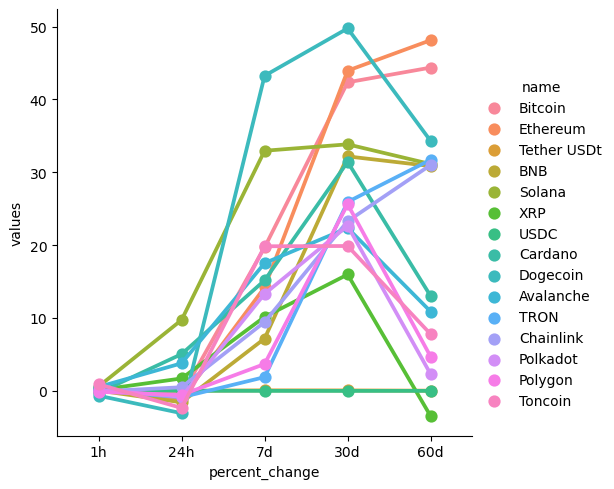

In [100]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [103]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

name  quote.USD.price                  timestamp
0    Bitcoin      60850.58345 2024-03-01 11:37:18.536276
15   Bitcoin      60850.58345 2024-03-01 11:37:19.013824
30   Bitcoin      60859.65321 2024-03-01 11:38:19.852693
45   Bitcoin      60902.71672 2024-03-01 11:39:20.480138
60   Bitcoin      60899.85558 2024-03-01 11:40:20.957421
75   Bitcoin      60905.06943 2024-03-01 11:41:21.816567
90   Bitcoin      60921.01774 2024-03-01 11:42:22.593603
105  Bitcoin      60971.95555 2024-03-01 11:43:23.282107
120  Bitcoin      60975.21439 2024-03-01 11:44:23.900122
135  Bitcoin      60973.44868 2024-03-01 11:45:24.352103
150  Bitcoin      61001.44034 2024-03-01 11:46:24.870279
165  Bitcoin      61013.91651 2024-03-01 11:47:25.831336
180  Bitcoin      61108.87847 2024-03-01 11:48:27.112516
195  Bitcoin      61111.55979 2024-03-01 11:49:28.644030
210  Bitcoin      61123.37476 2024-03-01 11:50:29.969873
225  Bitcoin      61175.67176 2024-03-01 11:51:32.274779
240  Bitcoin      61173.12177 2024-03-01 11:52:33.539160
255  Bitcoin      61207.49421 2024-03-01 11:53:35.397749
270  Bitcoin      61167.22907 2024-03-01 11:54:37.087876
285  Bitcoin      61180.50371 2024-03-01 11:55:39.303781
300  Bitcoin      61180.53580 2024-03-01 11:56:40.005391
315  Bitcoin      61157.70903 2024-03-01 11:57:41.482236
330  Bitcoin      61139.23778 2024-03-01 11:58:43.786506
345  Bitcoin      61129.28970 2024-03-01 11:59:45.176335
360  Bitcoin      61122.22971 2024-03-01 12:00:46.435721
375  Bitcoin      61096.95187 2024-03-01 12:01:47.811154
390  Bitcoin      61084.22516 2024-03-01 12:02:49.415034
405  Bitcoin      61084.32556 2024-03-01 12:03:50.040465
420  Bitcoin      61122.38872 2024-03-01 12:04:50.581445
435  Bitcoin      61096.32878 2024-03-01 12:05:51.085355
450  Bitcoin      61086.93257 2024-03-01 12:06:51.514102
465  Bitcoin      61124.93491 2024-03-01 12:07:52.918314
480  Bitcoin      61127.28579 2024-03-01 12:08:53.401095
495  Bitcoin      61130.23936 2024-03-01 12:09:54.700488
510  Bitcoin      61160.10253 2024-03-01 12:10:57.237569
525  Bitcoin      61175.01474 2024-03-01 12:11:58.503536
540  Bitcoin      61158.97583 2024-03-01 12:12:58.965376
555  Bitcoin      61168.54309 2024-03-01 12:14:00.232083
570  Bitcoin      61176.18572 2024-03-01 12:15:00.779797
585  Bitcoin      61167.76344 2024-03-01 12:16:01.243731
600  Bitcoin      61171.17809 2024-03-01 12:17:01.753300
615  Bitcoin      61199.88943 2024-03-01 12:18:03.060441
630  Bitcoin      61205.43519 2024-03-01 12:19:03.720576
645  Bitcoin      61276.33189 2024-03-01 12:20:05.098800
660  Bitcoin      61272.22942 2024-03-01 12:21:05.788806
675  Bitcoin      61272.22942 2024-03-01 12:22:06.539535
690  Bitcoin      61300.64659 2024-03-01 12:23:08.021094
705  Bitcoin      61339.69234 2024-03-01 12:24:08.564791
720  Bitcoin      61350.44217 2024-03-01 12:25:09.114122
735  Bitcoin      61337.34035 2024-03-01 12:26:10.586918

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

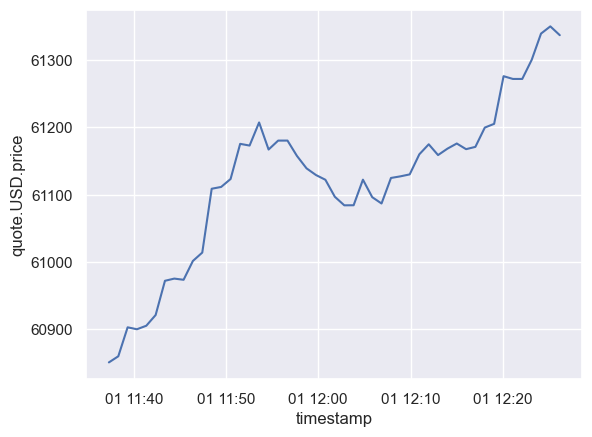

In [104]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)